In [190]:
import glob 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


In [191]:
def image_denoising(img):
    '''
    Input : Any image
    Output : Returns the image after denoising
    '''
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    return dst

In [192]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def adaptive_thresholding(img):
    '''
    Input : Any image 
    Output : Returns image after otsu method of image contrast enhancement
    
    '''
    
    ret2,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    return th1




In [193]:
mser = cv2.MSER_create() # create the MSER operator

In [194]:
from keras.models import load_model
model = load_model('text_nontext1.h5')
import keras
    
from PIL import Image
import cv2

def is_text(img):
    '''
    Input: any image
    Output: Gives the probability of presence of text in the image
    
    '''
    img = image_denoising(img)
    img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = adaptive_thresholding(img)
    
    img = cv2.resize(img, (32,32))
    img = img/255
    img= img.reshape(1,32, 32, 1)
    
    return model.predict_proba(img,verbose = 0)[0][1]
    

In [195]:
a = list(np.arange(0,62))
b = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
chars_dict = dict(zip(a,b))





In [196]:
char_model = load_model('character1.h5')
def find_char(img):
    '''
    Input : any image
    Output: Returns which character is present in the image out of the 62 characters
    
    '''
    img = image_denoising(img)
    img =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = adaptive_thresholding(img)
    img = cv2.resize(img, (32,32))
    img = img/255
    img= img.reshape(1,32, 32, 1)
    return char_model.predict_classes(img,verbose = 0)

In [199]:
def single_image(img):
    '''
    Input : Any image
    Output : Makes bounding boxes around the text characters in the image and predicts the character
    
    '''
    img = cv2.imread(img)
    img_copy = img.copy()
    img = image_denoising(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = adaptive_thresholding(gray)
    
    regions,boxes = mser.detectRegions(gray)
    boxes = np.array(boxes)
   
    
    text_images = 0
    for i in range(0,len(boxes)):
        x,y,w,h = boxes[i][0],boxes[i][1],boxes[i][2],boxes[i][3]
        cropped = img[y: y+h, x:x+w]
        predict = is_text(cropped)
        
        
        if predict > 0.95:
            text_images += 1
            cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),2)
            char = find_char(cropped)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img_copy,chars_dict[char[0]],(x,y), font, 1,(0,0,0),2,cv2.LINE_AA)
            
            
            
            
    #predictions = np.array(predictions)
    #unique,counts = np.unique(predictions,return_counts = True)
    #print(counts)
   
    
    print("No. of text containing boxes:",text_images)
    plt.imshow(img_copy)
    plt.show()
    
    

No. of text containing boxes: 26


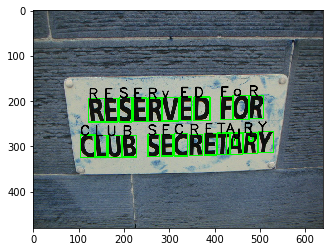

In [200]:
single_image('img_117.jpg')   # Just provide the image name in the box to see the prediction

(29, 4)
29


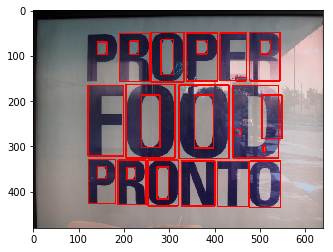

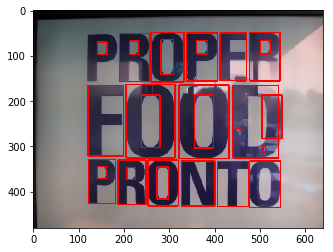

(9, 4)
8


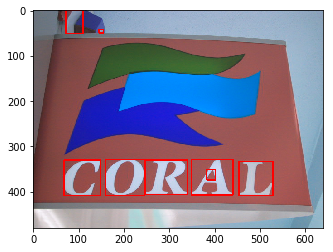

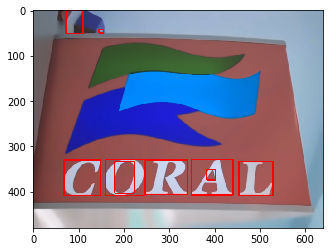

(111, 4)
90


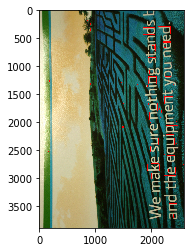

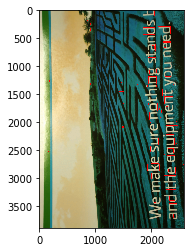

(15, 4)
14


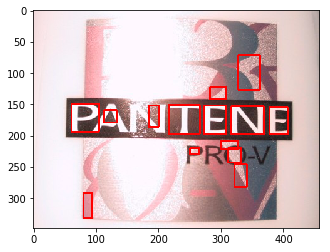

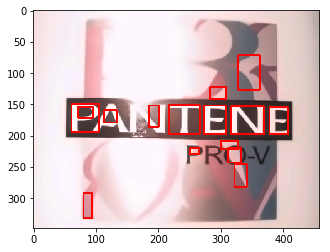

(21, 4)
11


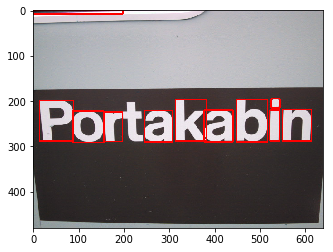

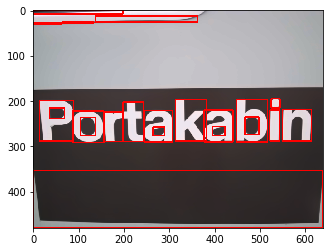